WORDS

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# j'import le fichier words.txt
df = pd.read_csv('words.txt', sep=" ", header=None, on_bad_lines='skip')
# et je renomme le colonnes
df.columns = ['ID', 'Seg', 'GrayLevel', 'Bound1', 'Bound2', 'Bound3', 'Bound4', 'Grammatical_tag', 'Transcription']
              

In [ ]:
# 75572 lignes et 9 variables
df.shape
df.head()

,ID,Seg,GrayLevel,Bound1,Bound2,Bound3,Bound4,Grammatical_tag,Transcription
0,a01-000u-00-00,ok,154,408.0,768.0,27.0,51.0,AT,A
1,a01-000u-00-01,ok,154,507.0,766.0,213.0,48.0,NN,MOVE
2,a01-000u-00-02,ok,154,796.0,764.0,70.0,50.0,TO,to
3,a01-000u-00-03,ok,154,919.0,757.0,166.0,78.0,VB,stop
4,a01-000u-00-04,ok,154,1185.0,754.0,126.0,61.0,NPT,Mr.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


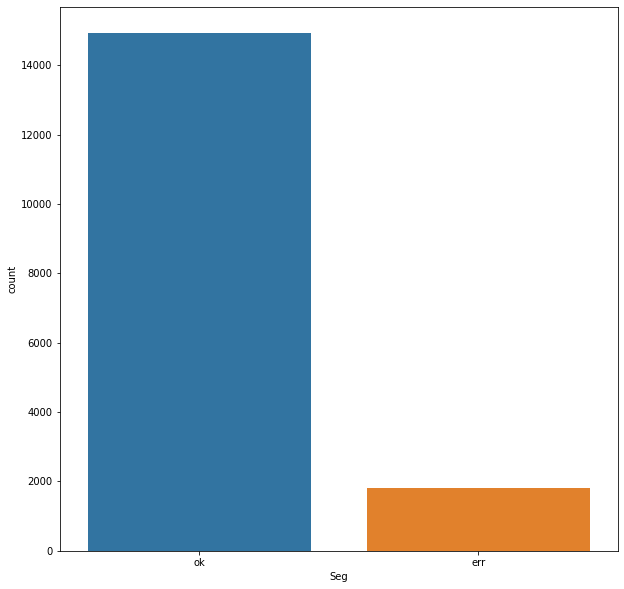

In [ ]:
# SEGMENTATION
figure = plt.figure(figsize = (10, 10))
sns.countplot(df.Seg);





In [ ]:
df_err = df.loc[df['Seg'] == 'err']
df_ok = df.loc[df['Seg'] == 'ok']
# exemple de mauvaise segmentation

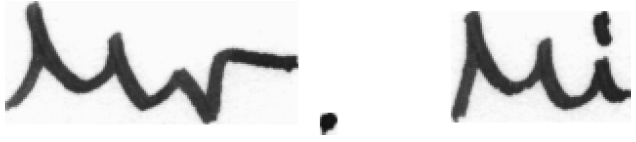

In [ ]:
# exemple de bonne segmentation

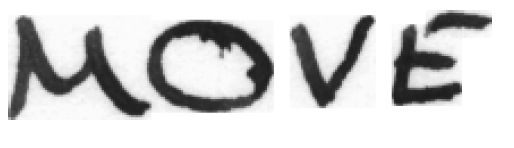

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


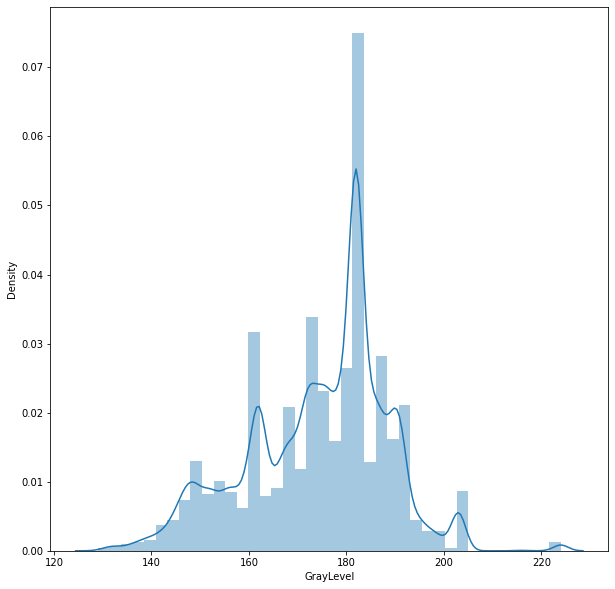

In [ ]:
# NUMBER OF COMPONENTS
# étude distribution
fig = plt.figure(figsize= (10, 10))
sns.distplot(df.GrayLevel, bins = 40);

GRAMMATICAL TAGS

In [ ]:
# combien de valeur unique ?
df['Grammatical_tag'].nunique()
# 232 tags différentes... 
# les tags les plus communes
df.value_counts(df['Grammatical_tag'])

Grammatical_tag
NN       9156
IN       5629
ATI      4413
JJ       4309
,        3713
         ... 
NP$-        1
-OD         1
IN-         1
-NP$        1
BEDZX       1
Length: 232, dtype: int64

In [ ]:
# plot les tags les plus fréquentes 
top_20_tags = pd.DataFrame(df['Grammatical_tag'].value_counts().sort_values(ascending = False).head(20))

top_20_tags



,Grammatical_tag
NN,9156
IN,5629
ATI,4413
JJ,4309
",",3713
NNS,3194
.,3046
NP,2702
CC,2381
VB,2183


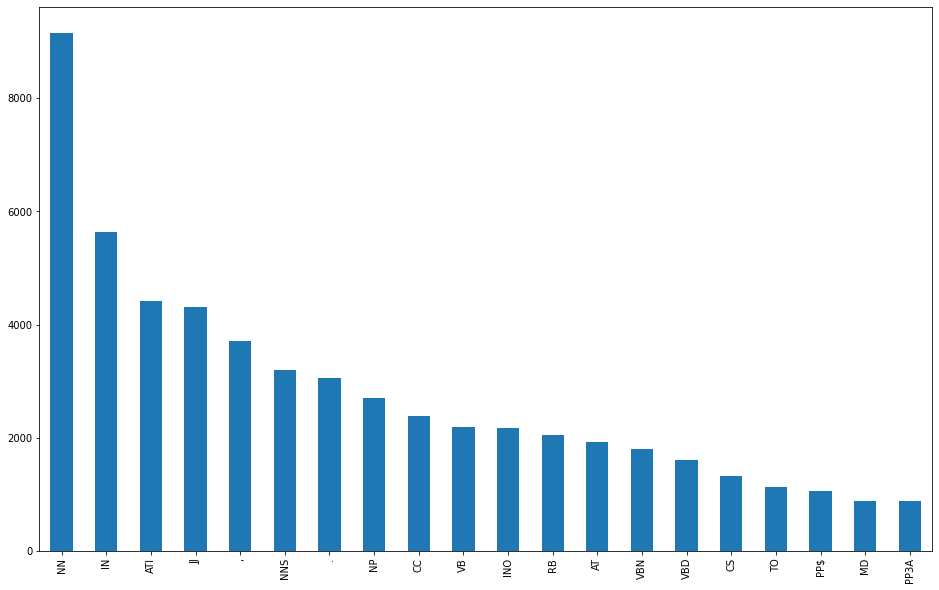

In [ ]:
fig = plt.figure(figsize=(16,10))
df['Grammatical_tag'].value_counts()[:20].plot(kind='bar');
    

TRANSCRIPTION

In [ ]:
df['Transcription'].nunique()

10864

In [ ]:
# si je met tout en minuscule ?



df['Transcription_lower'] = df['Transcription'].str.lower()

# df['Transscription_upper'] = df['Transcription'].astype(str).apply(lambda x : x.upper())


In [ ]:
df['Transcription_lower'].nunique()

9908

In [ ]:
y = df.value_counts(df['Transcription_lower']).sort_values(ascending = False).head(30)
y

Transcription_lower
the      4302
,        3713
.        3046
of       2216
to       1835
and      1725
a        1647
in       1338
that      843
was       770
he        727
is        675
for       629
it        611
as        525
had       511
with      509
be        496
on        471
i         460
his       451
'         414
at        407
but       399
by        370
not       346
this      343
which     306
have      288
an        281
dtype: int64

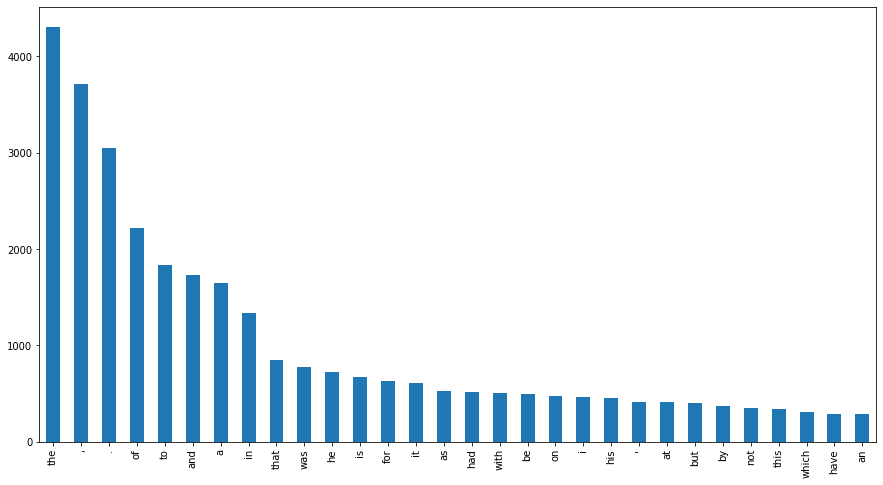

In [ ]:
# barplot des 30 mots les plus commun (après avoir mis tout en minuscule)
fig = plt.figure(figsize = (15 , 8))
df['Transcription_lower'].value_counts()[:30].plot(kind = 'bar');




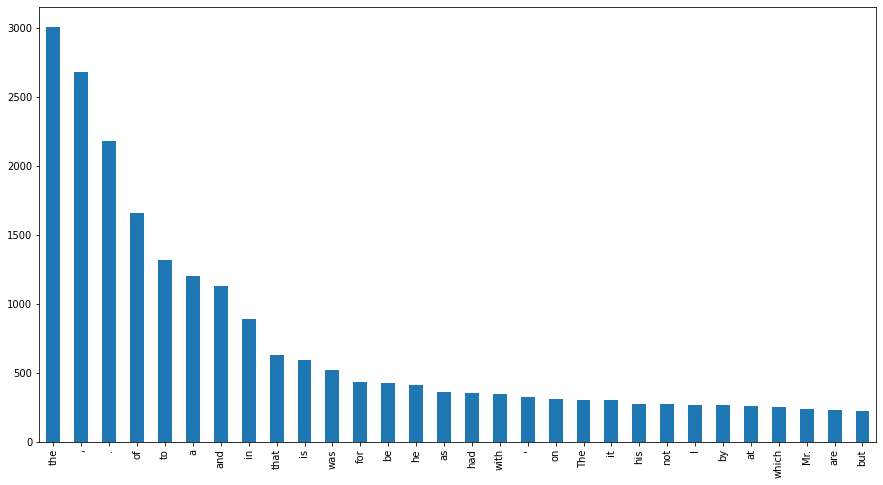

In [ ]:
# barplot des 30 mots les plus commun
fig = plt.figure(figsize = (15 , 8))
df['Transcription'].value_counts()[:30].plot(kind = 'bar');


In [ ]:
df.isna().sum()

ID                 0
Seg                0
GrayLevel          0
Bound1             0
Bound2             0
Bound3             0
Bound4             0
Grammatical_tag    0
Transcription      0
dtype: int64

In [ ]:
# quels sont les mots le plus souvent mal segmentés

df['Transcription'].groupby(df['Seg']).value_counts()[:40]



Seg  Transcription
err  ,                702
     the              489
     .                484
     of               269
     and              237
     to               234
     a                190
     in               175
     was              111
     is               107
     that             100
     )                 85
     (                 81
     for               78
     I                 74
     he                73
     on                67
     it                66
     as                65
     '                 63
     at                63
     with              60
     be                59
     his               59
     Mr.               55
     said              47
     not               46
     The               45
     an                43
     by                39
     this              38
     but               37
     had               36
     ;                 35
     which             35
     you               34
     ...               31
     have          

In [ ]:
# NOMBRE DE CARACTÈRES PAR MOT
df['words_size'] = df['Transcription'].str.len().astype('int64')
df['words_size'].value_counts(normalize = True)[:10]
# bcp de valuers abérrantes : des termes avec 187, 300, 1842 caractères

3     0.189832
2     0.154978
4     0.144551
1     0.139337
5     0.098568
6     0.072792
7     0.064826
8     0.045202
9     0.033200
10    0.021767
Name: words_size, dtype: float64

In [ ]:
df['words_size'].value_counts(ascending = True)[:20]

In [ ]:
data = df.loc[df['words_size'] == 70972]


In [ ]:
list(data['Transcription'])

["\nm02-083-00-00 ok 182 333 907 187 63 NP Peron\nm02-083-00-01 ok 182 562 902 285 70 VBD entered\nm02-083-00-02 ok 182 818 949 24 30 , ,\nm02-083-00-03 ok 182 885 943 42 29 AT a\nm02-083-00-04 ok 182 962 910 160 88 JJ large\nm02-083-00-05 ok 182 1158 933 137 34 NN man\nm02-083-00-06 ok 182 1276 966 14 17 , ,\nm02-083-00-07 ok 182 1324 919 144 50 WP who\nm02-083-00-08 ok 182 1520 911 161 56 HVD had\nm02-083-00-09 ok 182 1677 938 149 31 RB once\nm02-083-00-10 ok 182 1863 919 159 56 BEN been\nm02-083-01-00 ok 182 339 1092 343 56 JJ handsome\nm02-083-01-01 ok 182 715 1093 128 52 CC but\nm02-083-01-02 ok 182 867 1120 132 24 BEDZ was\nm02-083-01-03 ok 182 1038 1114 145 30 RN now\nm02-083-01-04 ok 182 1211 1093 516 97 JJ seedy-looking\nm02-083-01-05 ok 182 1747 1124 17 31 , ,\nm02-083-01-06 ok 182 1801 1120 42 27 AT a\nm02-083-01-07 ok 182 1881 1092 258 61 NN sufferer\nm02-083-02-00 ok 182 332 1266 137 61 IN from\nm02-083-02-01 ok 182 521 1264 538 63 NNS stomach-ulcers\nm02-083-02-02 ok 182 

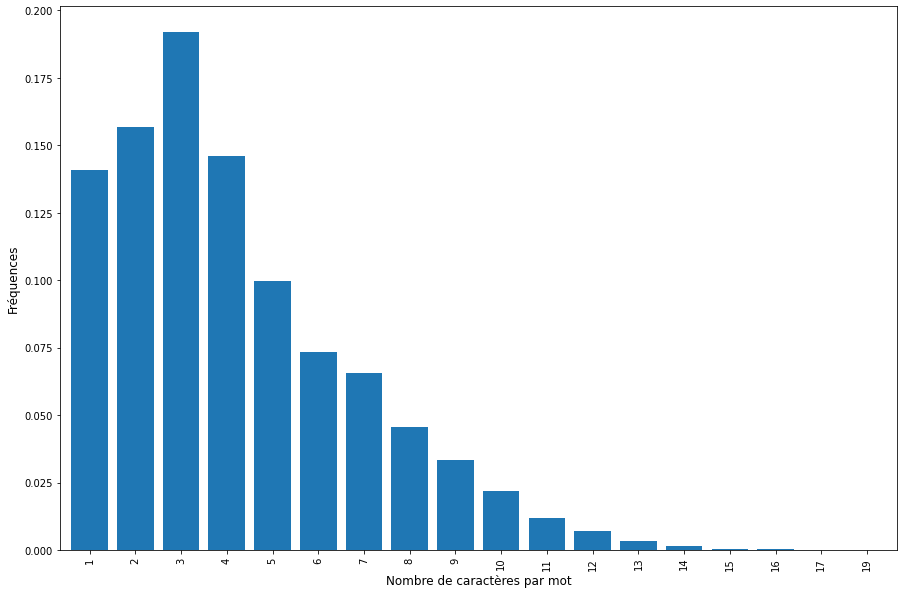

In [ ]:
# je conserve les words avec au maximum 25 caractères
df = df.loc[df['words_size'] <= 25]
df.shape
# je pers environ 800 lignes
plt.figure(figsize = (15, 10))
df['words_size'].value_counts(normalize = True).sort_index().plot(kind = 'bar', width = 0.8)
plt.xlabel('Nombre de caractères par mot', fontsize = 12)
plt.ylabel('Fréquences', fontsize = 12);



FORMS

In [ ]:
df = pd.read_csv('forms.txt', sep=" ", skiprows=16, header=None, on_bad_lines='skip')
df.head(5)

,0,1,2,3,4,5,6,7
0,a01-000u,0,2,prt,7,5,52,36
1,a01-000x,1,2,all,6,6,52,52
2,a01-003,2,3,prt,11,10,81,71
3,a01-003u,0,3,prt,11,10,80,73
4,a01-003x,3,3,prt,9,6,82,56


In [ ]:
df.columns = ['form_id', 'writer_id', 'n_sentences', 'segmentation', 'n_lines', 'n_good_seg', 'n_words', 'words_in_good_lines']

In [ ]:
df.head(5)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   form_id              1539 non-null   object
 1   writer_id            1539 non-null   int64 
 2   n_sentences          1539 non-null   int64 
 3   segmentation         1539 non-null   object
 4   n_lines              1539 non-null   int64 
 5   n_good_seg           1539 non-null   int64 
 6   n_words              1539 non-null   int64 
 7   words_in_good_lines  1539 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 96.3+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


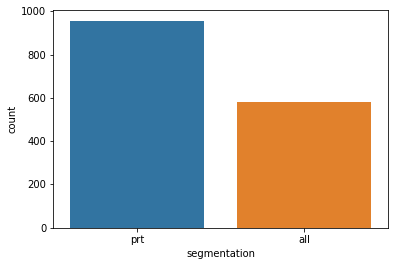

In [ ]:
# SEGMENTATION
# on constate que la majorité des 'modules' n'ont pas été bien ségmentés
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(df.segmentation);

In [ ]:
# effectivement, comme indiqué sur le site, nous avons 657 contributeurs différents
df['writer_id'].nunique()

657

In [ ]:
df.head(5)

,form_id,writer_id,n_sentences,segmentation,n_lines,n_good_seg,n_words,words_in_good_lines
0,a01-000u,0,2,prt,7,5,52,36
1,a01-000x,1,2,all,6,6,52,52
2,a01-003,2,3,prt,11,10,81,71
3,a01-003u,0,3,prt,11,10,80,73
4,a01-003x,3,3,prt,9,6,82,56


Text(0.5, 1.0, 'Lignes par contributeur')

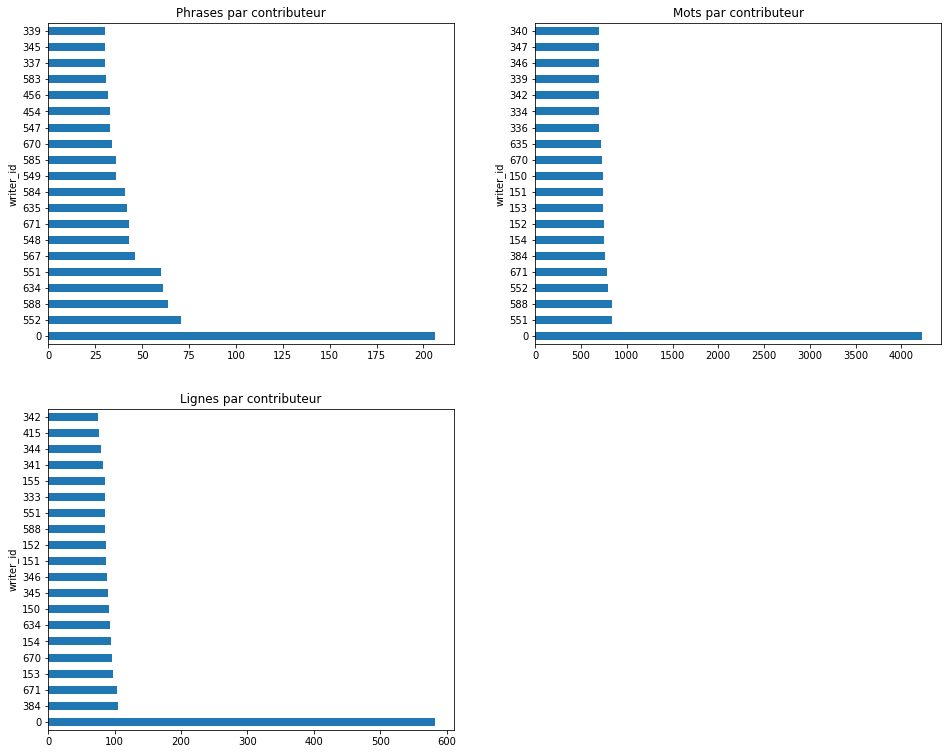

In [ ]:

# j'affiche un graphique à barres avec le nombre de PHRASES par contributeur (je selectionne ici les 20 premiers)
# j'affiche un graphique à barres avec le nombre de MOTS par contributeur (je selectionne ici les 20 premiers)
fig = plt.figure(figsize = (16, 13))

plt.subplot(2,2,1)
df['n_sentences'].groupby(df['writer_id']).sum().sort_values(ascending = False)[:20].plot(kind = 'barh');
plt.title('Phrases par contributeur')

plt.subplot(2,2,2)
df['n_words'].groupby(df['writer_id']).sum().sort_values(ascending = False)[:20].plot(kind = 'barh');
plt.title('Mots par contributeur')

plt.subplot(2,2,3)
df['n_lines'].groupby(df['writer_id']).sum().sort_values(ascending = False)[:20].plot(kind = 'barh');
plt.title('Lignes par contributeur')

Text(0.5, 1.0, 'Lignes par contributeur')

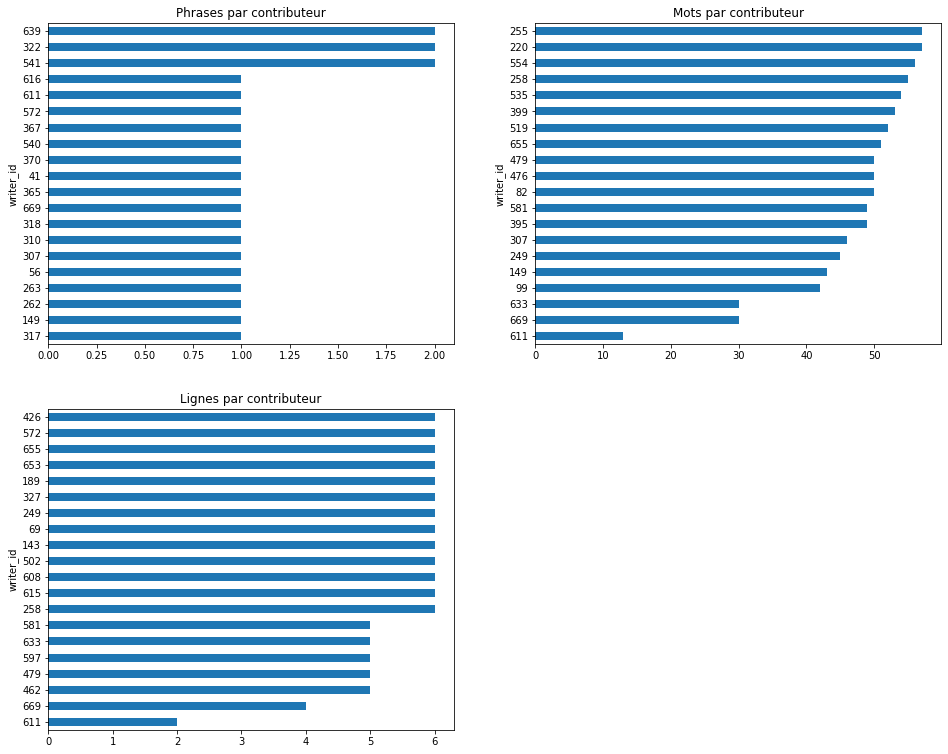

In [ ]:
### j'affiche les plus petits contributeurs

fig = plt.figure(figsize = (16, 13))

plt.subplot(2,2,1)
df['n_sentences'].groupby(df['writer_id']).sum().sort_values(ascending = True)[:20].plot(kind = 'barh');
plt.title('Phrases par contributeur')

plt.subplot(2,2,2)
df['n_words'].groupby(df['writer_id']).sum().sort_values(ascending = True)[:20].plot(kind = 'barh');
plt.title('Mots par contributeur')

plt.subplot(2,2,3)
df['n_lines'].groupby(df['writer_id']).sum().sort_values(ascending = True)[:20].plot(kind = 'barh');
plt.title('Lignes par contributeur')

In [ ]:
df['n_lines'].groupby(df['writer_id'] == 384).sum()
# 582


writer_id
False    13248
True       105
Name: n_lines, dtype: int64

In [ ]:
4222 / 840

5.026190476190476

In [ ]:
# nombre de mots et de phrases et lignes en moyenne par contributeur  : 175 mots et 8.6 phrases, 20 lignes
print(df['n_words'].groupby(df['writer_id']).sum().mean()) 
print(df['n_words'].groupby(df['writer_id']).sum().median()) 
print(df['n_words'].groupby(df['writer_id']).sum().std())


print(df['n_sentences'].groupby(df['writer_id']).sum().mean()) 
print(df['n_sentences'].groupby(df['writer_id']).sum().median()) 
print(df['n_sentences'].groupby(df['writer_id']).sum().std())

print(df['n_lines'].groupby(df['writer_id']).sum().mean()) 
print(df['n_lines'].groupby(df['writer_id']).sum().median())
print(df['n_lines'].groupby(df['writer_id']).sum().std()) 
# on constate que le contributeur 0 est un outlier ( > mots), en moyenne les contributeurs écrivent 175 mots

175.52511415525115
93.0
223.37769418993122
8.65296803652968
5.0
11.63303726306745
20.32420091324201
11.0
28.590782488435597


In [ ]:
# en excluant le super contributeur 0
df = df[df['writer_id'] != 0]


print(df['n_words'].groupby(df['writer_id']).sum().mean()) 
print(df['n_words'].groupby(df['writer_id']).sum().median()) 
print(df['n_words'].groupby(df['writer_id']).sum().std())


print(df['n_sentences'].groupby(df['writer_id']).sum().mean()) 
print(df['n_sentences'].groupby(df['writer_id']).sum().median()) 
print(df['n_sentences'].groupby(df['writer_id']).sum().std())

print(df['n_lines'].groupby(df['writer_id']).sum().mean()) 
print(df['n_lines'].groupby(df['writer_id']).sum().median())
print(df['n_lines'].groupby(df['writer_id']).sum().std()) 


169.35670731707316
92.5
157.91534368685362
8.352134146341463
5.0
8.71689217433162
19.46798780487805
11.0
18.33843532845794


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

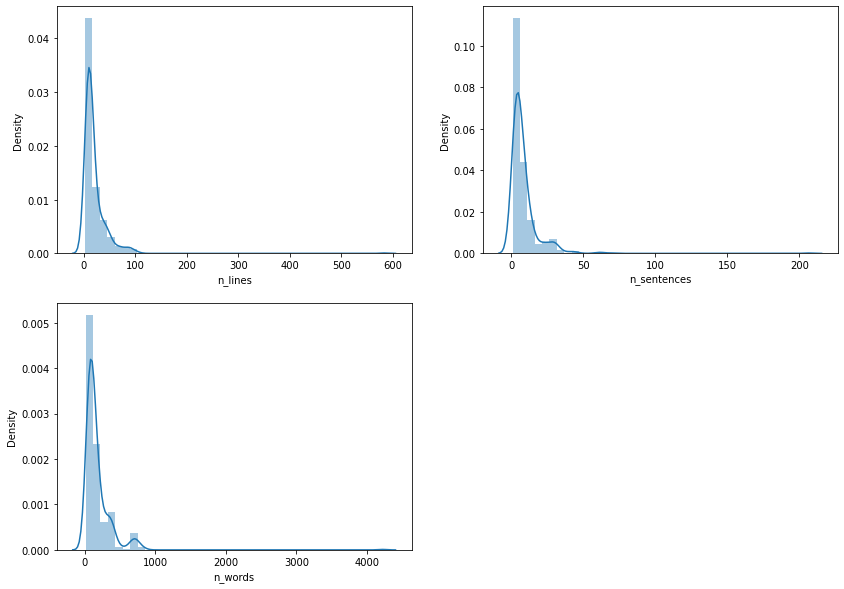

In [ ]:
# distribution du nombre de mots / phrases / et lignes par auteur

fig = plt.figure(figsize= (14,10))

plt.subplot(221)
sns.distplot(df['n_lines'].groupby(df['writer_id']).sum(), bins = 40);

plt.subplot(222)
sns.distplot(df['n_sentences'].groupby(df['writer_id']).sum(), bins = 40);

plt.subplot(223)
sns.distplot(df['n_words'].groupby(df['writer_id']).sum(), bins = 40);

# les graphiques ne sont pas très parlant à cause des valeurs extremes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

(0.0, 1000.0, 0.0, 0.008)

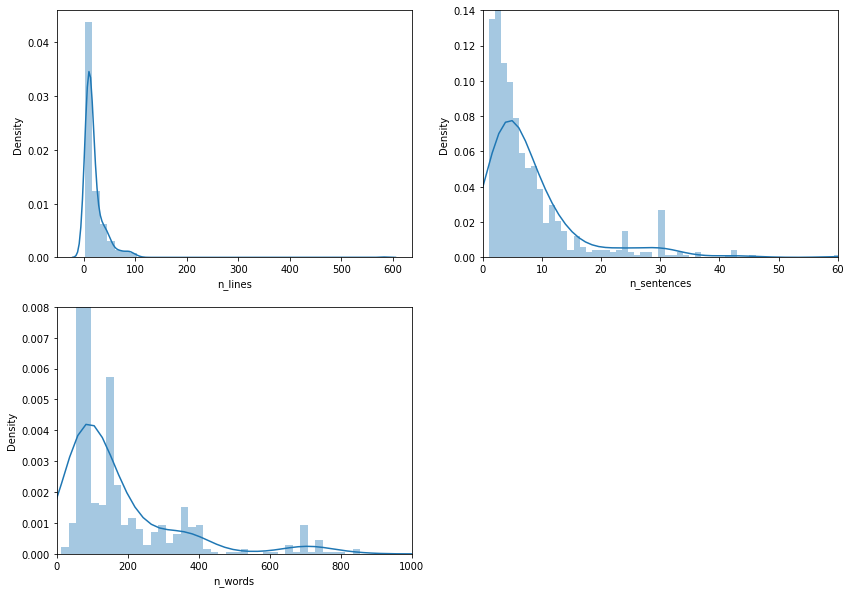

In [ ]:
# je plot les mêmes courbes en modifiant l'axe des abscisses

fig = plt.figure(figsize= (14,10))

plt.subplot(221)
sns.distplot(df['n_lines'].groupby(df['writer_id']).sum(), bins = 40);

plt.subplot(222)
sns.distplot(df['n_sentences'].groupby(df['writer_id']).sum(), bins = 200);
plt.axis([0, 60, 0, 0.14])

plt.subplot(223)
sns.distplot(df['n_words'].groupby(df['writer_id']).sum(), bins = 200);
plt.axis([0, 1000, 0, 0.008])

SENTENCES

In [ ]:

df_sent = pd.read_csv('sentences.txt', sep =' ', skiprows=25, on_bad_lines='skip', header=None)

df_sent.head()

,0,1,2,3,4,5,6,7,8,9
0,a01-000u-s00-00,0,ok,154,19,408,746,1661,89,A|MOVE|to|stop|Mr.|Gaitskell|from
1,a01-000u-s00-01,0,ok,156,19,395,932,1850,105,nominating|any|more|Labour|life|Peers
2,a01-000u-s00-02,0,ok,157,16,408,1106,1986,105,is|to|be|made|at|a|meeting|of|Labour
3,a01-000u-s01-00,1,err,156,14,1269,1292,1044,68,Mr.|Michael|Foot|has
4,a01-000u-s01-01,1,ok,157,20,395,1474,1830,94,put|down|a|resolution|on|the|subject


In [ ]:
df_sent.columns = ['id', 'n_sentences', 'segmentation', 
              'Gray_level', 'n_components', 'Bound1', 'Bound2', 'Bound3', 'Bound4', 'Transcription']
 

In [ ]:
df_sent.head()

,id,n_sentences,segmentation,Gray_level,n_components,Bound1,Bound2,Bound3,Bound4,Transcription
0,a01-000u-s00-00,0,ok,154,19,408,746,1661,89,A|MOVE|to|stop|Mr.|Gaitskell|from
1,a01-000u-s00-01,0,ok,156,19,395,932,1850,105,nominating|any|more|Labour|life|Peers
2,a01-000u-s00-02,0,ok,157,16,408,1106,1986,105,is|to|be|made|at|a|meeting|of|Labour
3,a01-000u-s01-00,1,err,156,14,1269,1292,1044,68,Mr.|Michael|Foot|has
4,a01-000u-s01-01,1,ok,157,20,395,1474,1830,94,put|down|a|resolution|on|the|subject


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


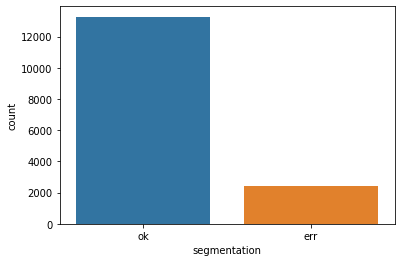

In [ ]:
# la segmentation des phrases est assez bonne
sns.countplot(df_sent.segmentation);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


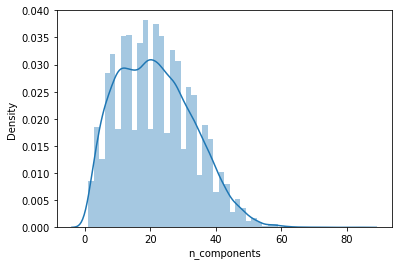

In [ ]:
# plot distribution du nombre d'éléments dans chaque phrase
sns.distplot(df_sent['n_components'])

In [ ]:
# étude sur le n_sentences 
#print(df_sent['n_sentences'].nunique())
# 14 valeurs uniques
# n_sentences : permet d'indixer la ligne se trouve la phrase
print(df_sent['n_sentences'].value_counts())

# il y a 14 valuers uniques et la manjorité des phrases semblent être incomplètes (0 = 4559)

0     4559
1     4539
2     3244
3     1683
4      903
5      418
6      191
7       91
8       46
9       19
10      12
12       2
13       1
11       1
Name: n_sentences, dtype: int64


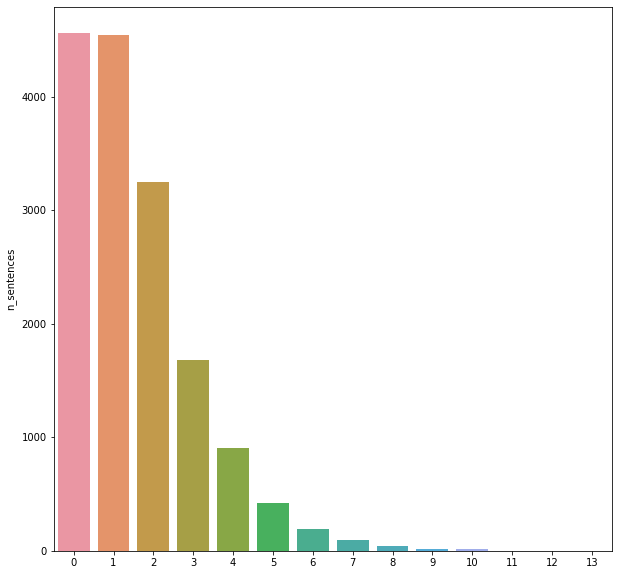

In [ ]:
# plot
fig = plt.figure(figsize = (10, 10))
sns.barplot(x=df_sent.n_sentences.value_counts().index, y=df_sent.n_sentences.value_counts());


In [ ]:
################
# plot mots, phrases et lignes bien segmentés 

df_words = pd.read_csv('words.txt', sep=" ", header=None, on_bad_lines='skip')
df_words.columns = ['ID', 'segmentation', 'GrayLevel', 'Bound1', 'Bound2', 'Bound3', 'Bound4', 'Grammatical_tag', 'Transcription']


df_sentences = pd.read_csv('sentences.txt', sep =' ', skiprows=25, on_bad_lines='skip', header=None)
df_sentences.columns = ['id', 'n_sentences', 'segmentation', 
              'Gray_level', 'n_components', 'Bound1', 'Bound2', 'Bound3', 'Bound4', 'Transcription']

df_lines = pd.read_csv('lines.txt', sep =' ',skiprows=23, on_bad_lines='skip', header=None)
df_lines.columns = ['id', 'segmentation', 
              'Gray_level', 'n_components', 'Bound1', 'Bound2', 'Bound3', 'Bound4', 'Transcription']

In [ ]:
df_words_prop = df_words['segmentation'].value_counts(normalize = True).reset_index()
df_sentences_prop = df_sentences['segmentation'].value_counts(normalize = True).reset_index()
df_lines_prop = df_lines['segmentation'].value_counts(normalize = True).reset_index()



df_final = pd.concat([df_words_prop, df_sentences_prop, df_lines_prop])

df_final['niveau'] = ['mots', 'mots', 'phrases', 'phrases', 'lignes', 'lignes']

df_final

,index,segmentation,niveau
0,ok,0.856600,mots
1,err,0.143400,mots
0,ok,0.844739,phrases
1,err,0.155261,phrases
0,ok,0.850119,lignes
1,err,0.149881,lignes


In [ ]:
print(df_words['segmentation'].value_counts(normalize = True))
print(df_sentences['segmentation'].value_counts(normalize = True))
print(df_lines['segmentation'].value_counts(normalize = True))

ok     0.8566
err    0.1434
Name: segmentation, dtype: float64
ok     0.844739
err    0.155261
Name: segmentation, dtype: float64
ok     0.850119
err    0.149881
Name: segmentation, dtype: float64


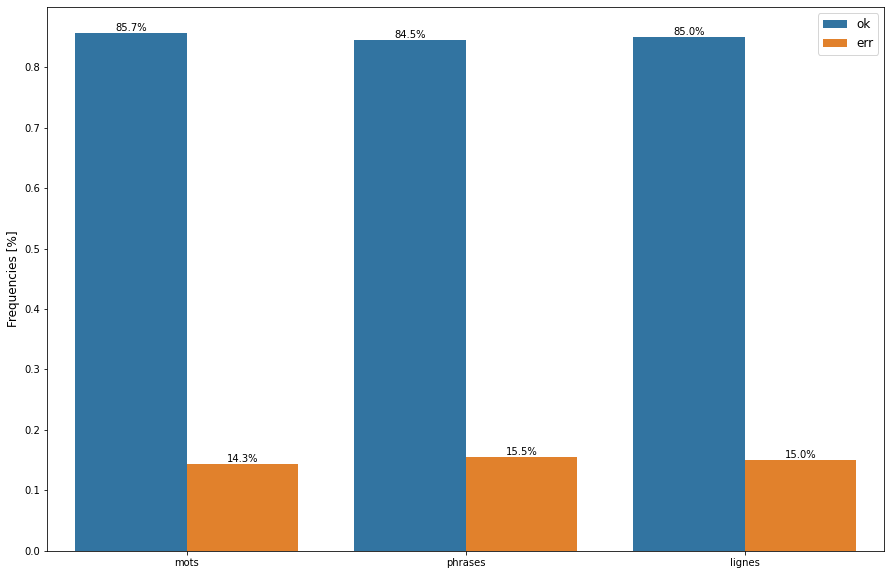

In [ ]:
plt.figure(figsize = (15, 10))
ax = sns.barplot(x = 'niveau', y = 'segmentation', hue = 'index', data = df_final)
plt.xlabel('', fontsize = 12)
plt.legend(fontsize = 12)
plt.ylabel('Frequencies [%]', fontsize = 12)


for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y), (x.mean(), y), 
            ha='center', va='bottom');